In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random 
from sklearn.preprocessing import MinMaxScaler

Identity RNN

W_inn= tensor([[1., 0.],
        [0., 1.]])
W_hh= tensor([[1., 0.],
        [0., 1.]])
w_out= tensor([[-1.,  1.]])
b_hh= tensor([[0., 0.]])
b_out= tensor([0.])
hidden state =  tensor([[[0., 0.]]])
Input Sequence =  tensor([[[0.1068, 1.8104],
         [1.1268, 0.6569],
         [3.2601, 2.1180]]])
Target =  tensor([[[1.7037],
         [1.2338],
         [0.0917]]])
-----After Training------
------Evaluation Test---------
Test Outputs: tensor([[[1.7037],
         [1.2338],
         [0.0916]]], grad_fn=<ViewBackward0>)
Evaluation Loss: 5.995204332975845e-15


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3133533311.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3133533311.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3133533311.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_hh_l0 = nn.Parameter(tor

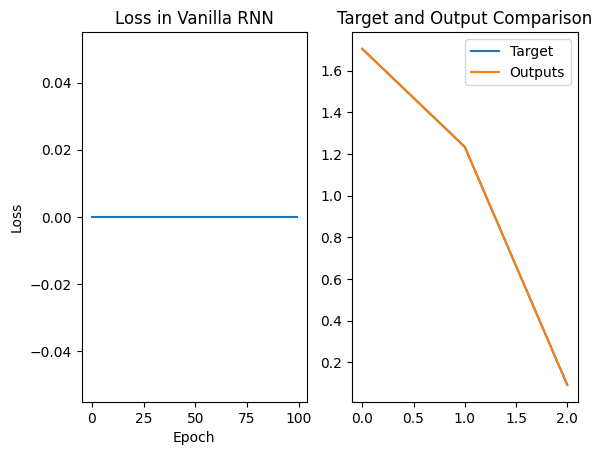

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

#vanilla structure normal
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers, transform_function='relu'):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.transform_function = transform_function
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1,nonlinearity='relu', batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        out, hidden = self.rnn(inputs, hidden)
        #out = F.relu(out) #apply transformation function
        out = self.fc(out) #apply yo all nunmber!

        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function='relu'):
    
    N_in = W_in.shape[1]
    N_out = W_out.shape[0]
    N_rec = W_hh.shape[0] 
    rnn_model = VanillaRNN(N_in, N_rec, N_out,num_layers=1, transform_function=transform_function)
    
    with torch.no_grad():
        
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.zeros_like(b_hh, dtype=torch.float))
        #acrescentamos isto
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))
    
    return rnn_model

#----------------------------------------
# ----------------parameters-------------
#----------------------------------------

#input weight matrix
W_in = torch.eye(2)
print('W_inn=',W_in)

#recurrent weight matrix
W_hh = torch.eye(2)
print('W_hh=',W_hh)

#output weitght matrix
W_out = torch.Tensor(np.array([[-1,1]]))
print('w_out=',W_out)

#recurrent bias
b_hh = torch.Tensor(np.array([[0,0]]))
print('b_hh=',b_hh)

#output bias
b_out = torch.Tensor([0])
print('b_out=',b_out)

rnn_model = make_rnn_from_networkparameters(W_in,W_hh,W_out,b_hh,b_out)
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

#input_sequence = torch.Tensor([[1, 0], [0, 1], [1, 1]])  
input_size = 2
input_length = 3
batch_size= 1
output_size = 1
input_sequence = abs(torch.randn(batch_size, input_length, input_size))

#inicialize the hidden state
hidden_state = rnn_model.init_hidden(input_sequence.size(0)) 

t = torch.zeros(1,input_length, input_size-1)
targets = t.numpy()

#calculate target_output depending on the input sequence
for i in range(input_length):
    targets[0][i]=input_sequence[0][i][1].item()-input_sequence[0][i][0].item()
targets_n = np.cumsum(targets,axis=1)
target_output = torch.from_numpy(targets_n )

print('hidden state = ',hidden_state)
print('Input Sequence = ',input_sequence)
print('Target = ',target_output)


num_epochs = 100

#----------------------------------------
# ----------------train-------------------
#----------------------------------------
pl_output = []
pl_targets = []
loss_vector = []

for epoch in range(num_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs, hidden = rnn_model(input_sequence, hidden_state)
    #pl_output.append(outputs.item())
    
    loss = criterion(outputs, target_output)
    #pl_targets.append(target_output1)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    loss_vector.append(round(loss.item()))
    # Print the training loss for every 100 epochs
    
    #if (epoch+1) % 10 == 0:
        #print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

print('-----After Training------')
#print('Outputs=',outputs)
#print('Loss=',loss)

import matplotlib.pyplot as plt
plt.subplot(121)
#PLOT THE LOSS
x_axis = torch.arange(0, num_epochs)
plt.subplot(121)
plt.plot(x_axis, loss_vector)
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(122)
### PRINT THE OUTPUT AND TARGET
plt.plot(target_output[0,:,0].detach().numpy(),label='Target')
plt.plot(outputs[0,:,0].detach().numpy(),label='Outputs')
plt.title('Target and Output Comparison')
plt.legend()

#----------------------------------------
# ----------------test-------------------
#----------------------------------------
print('------Evaluation Test---------')
rnn_model.eval()

#forward pass on test input
test_outputs, _ = rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0)))
eval_loss = criterion(test_outputs, target_output)
#print(rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0))))
# Print the test outputs
print("Test Outputs:",test_outputs)
print("Evaluation Loss:", eval_loss.item())

Generate Random Trials

W_in: tensor([[ 0.2245, -0.1799],
        [-0.4311,  0.2148]])
W_hh: tensor([[ 0.0887,  0.4335],
        [-0.3085,  0.6688]])
W_out: tensor([[-0.4030,  0.7020]])
b_hh: tensor([[-0.2237,  0.4891]])
b_out: tensor([-0.4075])
Input Sequence =  tensor([[[0.2493, 0.8774],
         [0.2959, 0.6258],
         [0.7759, 1.4562]],

        [[0.9852, 0.7490],
         [0.6245, 0.7299],
         [0.6346, 0.4434]],

        [[1.3938, 1.1428],
         [0.3536, 1.1319],
         [0.8631, 1.3623]]])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\4116738446.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\4116738446.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\4116738446.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_hh_l0 = nn.Parameter(tor

-----After Training------
target_array =  [[[ 0.6280712 ]
  [ 0.95796037]
  [ 1.6382716 ]]

 [[-0.23624808]
  [-0.1308794 ]
  [-0.32204363]]

 [[-0.25094938]
  [ 0.527359  ]
  [ 1.026556  ]]]
output_array =  [[[ 0.19466248]
  [ 0.5084188 ]
  [ 0.701887  ]]

 [[-0.00691372]
  [ 0.33788326]
  [ 0.44806394]]

 [[-0.03962266]
  [ 0.49741128]
  [ 0.7319031 ]]]


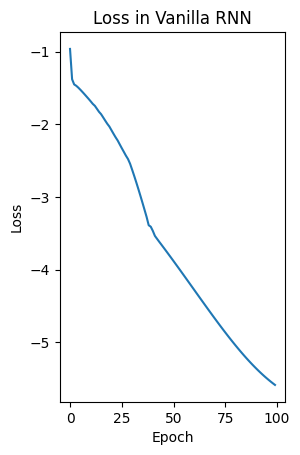

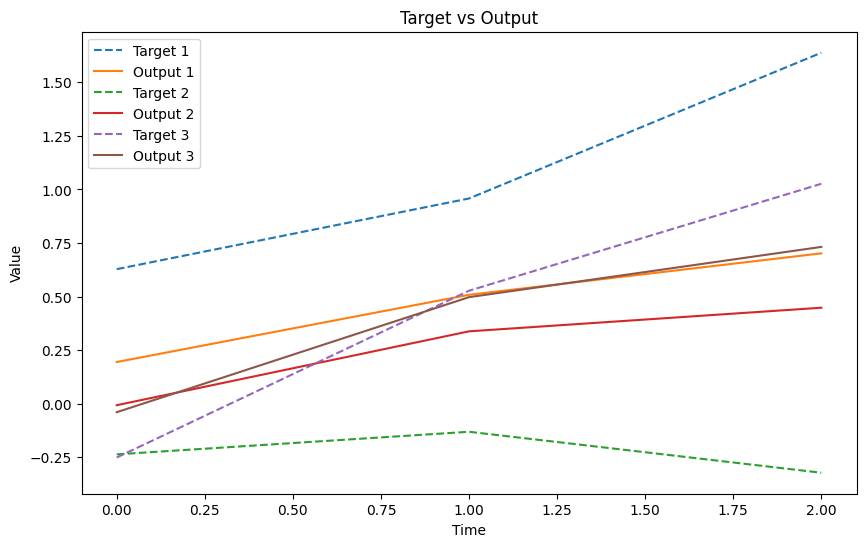

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch.nn.init as init
import math

#vanilla structure normal
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers, transform_function='relu'):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.transform_function = transform_function
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1,nonlinearity='relu', batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        out, hidden = self.rnn(inputs, hidden)
        #out = F.relu(out) #apply transformation function
        out = self.fc(out) #apply yo all nunmber!

        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function='relu'):
    
    N_in = W_in.shape[1]
    N_out = W_out.shape[0]
    N_rec = W_hh.shape[0] 
    rnn_model = VanillaRNN(N_in, N_rec, N_out,num_layers=1, transform_function=transform_function)
    
    with torch.no_grad():
        
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.zeros_like(b_hh, dtype=torch.float))
        #acrescentamos isto
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))
    
    return rnn_model

input_size = 2
input_length = 3
batch_size= 3
output_size = 1
hidden_size = 2

def generate_random_parameters(input_size, hidden_size, output_size):
    W_in = torch.empty(hidden_size, input_size)
    W_hh = torch.empty(hidden_size, hidden_size)
    W_out = torch.empty(output_size, hidden_size)
    b_hh = torch.empty(1, hidden_size)
    b_out = torch.empty(output_size)

    init_range = math.sqrt(1.0 / hidden_size)

    init.uniform_(W_in, -init_range, init_range)
    init.uniform_(W_hh, -init_range, init_range)
    init.uniform_(W_out, -init_range, init_range)
    init.uniform_(b_hh, -init_range, init_range)
    init.uniform_(b_out, -init_range, init_range)
    return W_in, W_hh, W_out, b_hh, b_out

W_in, W_hh, W_out, b_hh, b_out = generate_random_parameters(input_size, hidden_size, output_size)
print("W_in:", W_in)
print("W_hh:", W_hh)
print("W_out:", W_out)
print("b_hh:", b_hh)
print("b_out:", b_out)

rnn_model = make_rnn_from_networkparameters(W_in,W_hh,W_out,b_hh,b_out)
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

#-----INPUT AND TARGET ------
input_sequence = abs(torch.randn(batch_size, input_length, input_size))
print('Input Sequence = ',input_sequence)
hidden_state = rnn_model.init_hidden(input_sequence.size(0)) 

#Calculate targets based on the input sequence
#targets = input_sequence[:, :, 1] - input_sequence[:, :, 0]
#targets_cumsum = torch.cumsum(targets, axis=1) #cumulative sum
#target_output = targets_cumsum.unsqueeze(2)

# Repeat the target output along the batch dimension
#target_output = target_output.repeat(1, 1, batch_size)

# Transpose the target output to match the shape of the input_sequence
#target_output = target_output.transpose(0, 2)


num_epochs = 100
targets = input_sequence[:, :, 1] - input_sequence[:, :, 0]
targets_cumsum = torch.cumsum(targets, axis=1) #cumulative sum
target_output = targets_cumsum.unsqueeze(2)
#target_output = target_output.transpose(0, 2)
#print('target output = ',target_output)

#----------------------------------------
# ----------------train------------------
#----------------------------------------
pl_output = []
pl_targets = []
loss_vector = []
output_vector = []

for epoch in range(num_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    batch_loss = 0.0
    for batch in range(batch_size):
        input_batch = input_sequence[batch].unsqueeze(0)
        target_batch = target_output[batch].unsqueeze(0)
        hidden_batch = hidden_state[:, batch, :].unsqueeze(1)
        #Calculate targets based on the input sequence
        #print('Input[',batch,']=',input_sequence[batch])
        #print('Target[',batch,']=',target_output[batch].unsqueeze(0))
        
        # Forward pass
        outputs, hidden = rnn_model(input_batch, hidden_batch)
        #pl_output.append(outputs.item())
        #output_vector.append(outputs)
        loss = criterion(outputs, target_batch)
        #pl_targets.append(target_output1)
    
        batch_loss += loss.item()
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        if epoch == 1:
            ##print('outputs = ',outputs)
            output_vector.append(outputs)
    
    # Calculate average loss per batch
    batch_loss /= batch_size
    loss_vector.append(batch_loss)
    # Print the training loss for every 100 epochs
    
    #if (epoch+1) % 100 == 0:
     #   print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {batch_loss}")

#print('Target = ',target_output)
print('-----After Training------')
#print('Outputs=',output_vector)
#print('Loss=',loss)


import matplotlib.pyplot as plt

#PLOT THE LOSS
x_axis = torch.arange(0, num_epochs)
plt.subplot(121)
plt.plot(x_axis, np.log(loss_vector))
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

output_array = torch.cat(output_vector).detach().numpy()
target_array = target_output.detach().numpy()
print('target_array = ',target_array)
print('output_array = ', output_array)
target_array_2d = target_array.reshape(target_array.shape[0], target_array.shape[1])
output_array_2d = output_array.reshape(output_array.shape[0], output_array.shape[1])

# Plot target_array and output_array
plt.figure(figsize=(10, 6))
for i in range(target_array_2d.shape[0]):
    plt.plot(target_array_2d[i], label=f'Target {i+1}', linestyle='--')
    plt.plot(output_array_2d[i], label=f'Output {i+1}', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Target vs Output')
plt.show()


Unbounded Line Attractors 
- hidden state inicializado with beta

W_inn= tensor([[-1.,  1.],
        [ 1., -1.]])
W_hh= tensor([[0., 1.],
        [1., 0.]])
w_out= tensor([[0.5000, 0.5000]])
b_hh= tensor([[0., 0.]])
b_out= tensor([-100.])
hidden state =  tensor([[[100, 100],
         [100, 100],
         [100, 100]]])
Input Sequence =  tensor([[[0.8907, 0.9973],
         [0.2295, 0.4120],
         [1.1029, 0.6688]],

        [[0.0085, 0.2374],
         [0.9059, 0.1297],
         [0.5847, 0.0621]],

        [[0.4824, 0.9561],
         [0.0867, 0.9919],
         [1.3413, 0.8774]]])
Target =  tensor([[[ 0.1065],
         [ 0.2890],
         [-0.1450]],

        [[ 0.2289],
         [-0.5473],
         [-1.0699]],

        [[ 0.4737],
         [ 1.3789],
         [ 0.9150]]])
outputs =  tensor([[[-37.0611],
         [-37.0611],
         [-37.0611]]], grad_fn=<ViewBackward0>)
outputs =  tensor([[[-36.3182],
         [-36.3182],
         [-36.3182]]], grad_fn=<ViewBackward0>)
outputs =  tensor([[[-34.8582],
         [-34.8582],
         [-34.8582]]], grad_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\2788779871.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\2788779871.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\2788779871.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_hh_l0 = nn.Parameter(tor

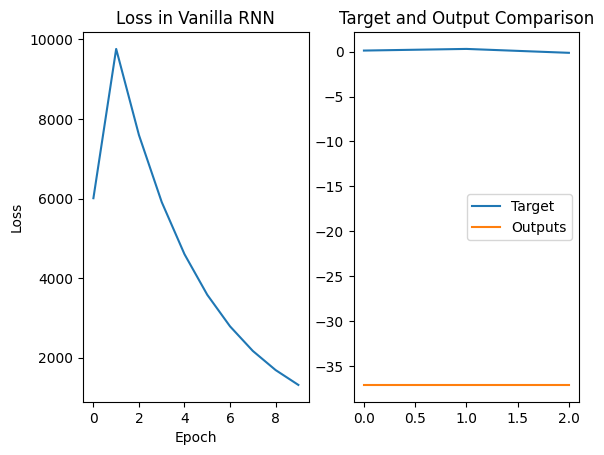

In [30]:
alpha = 1 # difference between two channels
beta = 100

#vanilla structure normal
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers, transform_function='relu'):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.transform_function = transform_function
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1,nonlinearity='relu', batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        out, hidden = self.rnn(inputs, hidden)
        out = self.fc(out) #apply yo all nunmber!
        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.full((self.num_layers, batch_size, self.hidden_size), beta)

def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function='relu'):
    
    N_in = W_in.shape[1]
    N_out = W_out.shape[0]
    N_rec = W_hh.shape[0] 
    rnn_model = VanillaRNN(N_in, N_rec, N_out,num_layers=1, transform_function=transform_function)
    
    with torch.no_grad():
        
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.zeros_like(b_hh, dtype=torch.float))
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))
    
    return rnn_model

#----------------------------------------------
# ---------------- parameters -----------------
#----------------------------------------------

#input weight matrix
W_in = alpha*torch.Tensor(np.array([[-1,1],[1,-1]]))
print('W_inn=',W_in)

#recurrent weight matrix
W_hh = torch.Tensor(np.array([[0,1],[1,0]]))
print('W_hh=',W_hh)

#output weitght matrix
W_out = (1/(2*alpha))*torch.Tensor(np.array([[1,1]]))
print('w_out=',W_out)

#recurrent bias
b_hh = torch.Tensor(np.array([[0,0]]))
print('b_hh=',b_hh)

#output bias
b_out = torch.Tensor([-beta/alpha])
print('b_out=',b_out)


rnn_model = make_rnn_from_networkparameters(W_in,W_hh,W_out,b_hh,b_out)
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

#input_sequence = torch.Tensor([[1, 0], [0, 1], [1, 1]])  
input_size = 2
input_length = 3
batch_size= 3
output_size = 1
input_sequence = abs(torch.randn(batch_size, input_length, input_size))

#inicialize the hidden state
hidden_state = rnn_model.init_hidden(input_sequence.size(0))

targets = input_sequence[:, :, 1] - input_sequence[:, :, 0]
targets_cumsum = torch.cumsum(targets, axis=1) #cumulative sum
target_output = targets_cumsum.unsqueeze(2)

print('hidden state = ',hidden_state)
print('Input Sequence = ',input_sequence)
print('Target = ',target_output)

num_epochs = 10

#----------------------------------------
# ----------------train-------------------
#----------------------------------------
pl_output = []
pl_targets = []
loss_vector = []
output_vector = []

for epoch in range(num_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    batch_loss = 0.0
    for batch in range(batch_size):
        input_batch = input_sequence[batch].unsqueeze(0)
        target_batch = target_output[batch].unsqueeze(0)
        hidden_batch = hidden_state[:, batch, :].unsqueeze(1).to(input_batch.dtype)
        
        # Forward pass
        outputs, hidden = rnn_model(input_batch, hidden_batch)
        #pl_output.append(outputs.item())
        #print('Outputs[',epoch,']=',outputs)
        loss = criterion(outputs, target_batch)
        #pl_targets.append(target_output1)
        #plt.plot(target_output,outputs)
        # Backward pass and optimization
        batch_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #print('targets: numero=',epoch,' and batch size=',batch,' é igual',target_batch)
        #print('outputs: numero=',epoch,' and batch size=',batch,' é igual',outputs)
        
        
        #plt.figure()
        #plt.plot(target_batch[0,:,0].detach().numpy(),label='Target')
        #plt.plot(outputs[0,:,0].detach().numpy(),label='Outputs')
        #plt.legend()
        
        
        if epoch == num_epochs-1:
            print('outputs = ',outputs)
            output_vector.append(outputs)
        # Print the training loss for every 100 epochs
    batch_loss /= batch_size
    loss_vector.append(batch_loss)
    
        #if (epoch+1) % 10 == 0:
            #print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

outputs_final = torch.cat(output_vector,dim=0)
print('-----After Training------')
print('Outputs=',outputs_final)
print('Loss=',loss_vector)

import matplotlib.pyplot as plt
plt.subplot(121)
#PLOT THE LOSS
x_axis = torch.arange(0, num_epochs)
plt.subplot(121)
plt.plot(x_axis, loss_vector)
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(122)
### PRINT THE OUTPUT AND TARGET
plt.plot(target_output[0,:,0].detach().numpy(),label='Target')
plt.plot(outputs_final[0,:,0].detach().numpy(),label='Outputs')
plt.title('Target and Output Comparison')
plt.legend()

#----------------------------------------

# ----------------test-------------------
#----------------------------------------
print('------Evaluation Test---------')
rnn_model.eval()

#forward pass on test input
test_outputs, _ = rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0)).to(input_sequence.dtype))
eval_loss = criterion(test_outputs, target_output)
#print(rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0))))
# Print the test outputs
print("Test Outputs:",test_outputs)
print("Evaluation Loss:", eval_loss.item())


In [23]:
torch.FloatTensor(1, 3, 2).uniform_(-100, 100)

tensor([[[-56.7009, -85.5489],
         [  0.1364, -95.6815],
         [-84.1146,   9.7341]]])

BOUNDED LINE ATTRACTORS

W_inn= tensor([[-1.,  1.],
        [ 1., -1.]])
W_hh= tensor([[ 0., -1.],
        [-1.,  0.]])
w_out= tensor([[ 0.5000, -0.5000]])
b_hh= tensor([[100., 100.]])
b_out= tensor([0.])
hidden state =  tensor([[[50., 50.],
         [50., 50.],
         [50., 50.]]])
Input Sequence =  tensor([[[0.8292, 0.1329],
         [0.3255, 0.5968],
         [0.3842, 0.0189]],

        [[1.1689, 0.8682],
         [1.3703, 0.1752],
         [1.1794, 2.3859]],

        [[0.6513, 0.4597],
         [1.0468, 0.1861],
         [0.3545, 0.1033]]])
Target =  tensor([[[-0.6963],
         [-0.4250],
         [-0.7903]],

        [[-0.3007],
         [-1.4957],
         [-0.2892]],

        [[-0.1916],
         [-1.0522],
         [-1.3034]]])
-----After Training------
Outputs= tensor([[[12339515.],
         [12339515.],
         [12339515.]],

        [[12092725.],
         [12092725.],
         [12092725.]],

        [[11604080.],
         [11604080.],
         [11604080.]]], grad_fn=<CatBackward0>)
Loss= [0.0016

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3472407438.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3472407438.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3472407438.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_hh_l0 = nn.Parameter(tor

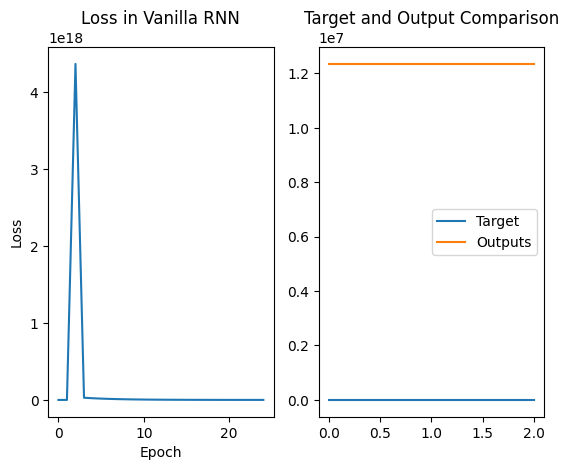

In [12]:
#vanilla structure normal
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers, transform_function='relu'):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.transform_function = transform_function
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1,nonlinearity='relu', batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        out, hidden = self.rnn(inputs, hidden)
        out = self.fc(out) #apply yo all nunmber!

        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.ones(self.num_layers, batch_size, self.hidden_size)*(beta/2)


#----------------------------------------
# ----------------parameters-------------
#----------------------------------------

#define alpha & beta
#beta/alpha capacity
alpha = 1 # difference between two channels
beta = 100 # 

#input weight matrix
W_in = alpha*torch.Tensor(np.array([[-1,1],[1,-1]]))
print('W_inn=',W_in)

#recurrent weight matrix
W_hh = torch.Tensor(np.array([[0,-1],[-1,0]]))
print('W_hh=',W_hh)

#output weitght matrix
W_out = (1/(2*alpha))*torch.Tensor(np.array([[1,-1]]))
print('w_out=',W_out)

#recurrent bias
b_hh = beta * torch.Tensor(np.array([[1,1]]))
print('b_hh=',b_hh)

#output bias
b_out = torch.Tensor([0])
print('b_out=',b_out)


rnn_model = make_rnn_from_networkparameters(W_in,W_hh,W_out,b_hh,b_out)
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

#input_sequence = torch.Tensor([[1, 0], [0, 1], [1, 1]])  
input_size = 2
input_length = 3
batch_size= 3
output_size = 1
input_sequence = abs(torch.randn(batch_size, input_length, input_size))

#inicialize the hidden state
hidden_state = rnn_model.init_hidden(input_sequence.size(0)) 

targets = input_sequence[:, :, 1] - input_sequence[:, :, 0]
targets_cumsum = torch.cumsum(targets, axis=1) #cumulative sum
target_output = targets_cumsum.unsqueeze(2)

print('hidden state = ',hidden_state)
print('Input Sequence = ',input_sequence)
print('Target = ',target_output)


num_epochs = 25

#----------------------------------------
# ----------------train-------------------
#----------------------------------------
pl_output = []
pl_targets = []
loss_vector = []
output_vector = []

for epoch in range(num_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    batch_loss = 0.0
    for batch in range(batch_size):
        input_batch = input_sequence[batch].unsqueeze(0)
        target_batch = target_output[batch].unsqueeze(0)
        hidden_batch = hidden_state[:, batch, :].unsqueeze(1)
        
        # Forward pass
        outputs, hidden = rnn_model(input_batch, hidden_batch)
        loss = criterion(outputs, target_batch)
        # Backward pass and optimization
        batch_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #print('targets: numero=',epoch,' and batch size=',batch,' é igual',target_batch)
        #print('outputs: numero=',epoch,' and batch size=',batch,' é igual',outputs)
        
        
        #plt.figure()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #plt.plot(target_batch[0,:,0].detach().numpy(),label='Target')
        #plt.plot(outputs[0,:,0].detach().numpy(),label='Outputs')
        #plt.legend()
        
        
        if epoch == num_epochs-1:
            #print('outputs = ',outputs)
            output_vector.append(outputs)
        # Print the training loss for every 100 epochs
    batch_loss /= batch_size
    loss_vector.append(batch_loss)
 
outputs_final = torch.cat(output_vector,dim=0)
print('-----After Training------')
print('Outputs=',outputs_final)
print('Loss=',loss_vector)

import matplotlib.pyplot as plt
plt.subplot(121)
#PLOT THE LOSS
x_axis = torch.arange(0, num_epochs)
plt.subplot(121)
plt.plot(x_axis, loss_vector)
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(122)
### PRINT THE OUTPUT AND TARGET
plt.plot(target_output[0,:,0].detach().numpy(),label='Target')
plt.plot(outputs_final[0,:,0].detach().numpy(),label='Outputs')
plt.title('Target and Output Comparison')
plt.legend()

#----------------------------------------
# ----------------test-------------------
#----------------------------------------
print('------Evaluation Test---------')
rnn_model.eval()

#forward pass on test input
test_outputs, _ = rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0)))
eval_loss = criterion(test_outputs, target_output)
#print(rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0))))
# Print the test outputs
print("Test Outputs:",test_outputs)
print("Evaluation Loss:", eval_loss.item())


1 - Noise in the inoputs

Standart deviation of the noise =  0.3626076403790207
W_inn= tensor([[1., 0.],
        [0., 1.]])
W_hh= tensor([[1., 0.],
        [0., 1.]])
w_out= tensor([[-1.,  1.]])
b_hh= tensor([[0., 0.]])
b_out= tensor([0.])
Input Sequence =  tensor([[[2.4360, 1.3261],
         [1.1518, 0.4139],
         [0.0338, 0.0653]],

        [[0.5898, 1.1214],
         [0.0684, 0.0380],
         [0.4168, 0.1522]],

        [[0.4109, 0.4442],
         [1.8574, 1.2459],
         [0.4152, 1.1681]]])
NOISE INPUTS =  tensor([[[ 2.2720,  1.1450],
         [ 0.6939,  0.2646],
         [-0.0619,  0.4148]],

        [[ 0.6842,  0.6936],
         [-0.1714, -0.4240],
         [ 0.3423,  0.1101]],

        [[ 0.1426, -0.2220],
         [ 1.7288,  1.4707],
         [ 0.8751,  0.9937]]])
hidden state =  tensor([[[50., 50.],
         [50., 50.],
         [50., 50.]]])
Target =  tensor([[[-1.1270],
         [-1.5564],
         [-1.0797]],

        [[ 0.0095],
         [-0.2431],
         [-0.4753]],

        [[-0.3646],
 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\1797933526.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\1797933526.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\1797933526.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_hh_l0 = nn.Parameter(tor

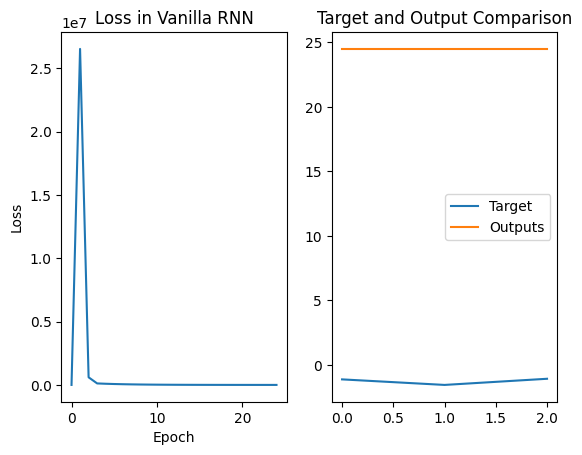

In [14]:
import random

#noise_stddev = 0.1  # Standard deviation of the noise
noise_stddev_range = (0.1, 0.5)  # Range for standard deviation of the noise
noise_stddev = random.uniform(noise_stddev_range[0], noise_stddev_range[1])
print('Standart deviation of the noise = ', noise_stddev)

#vanilla structure normal
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers, transform_function='relu'):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.transform_function = transform_function
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1,nonlinearity='relu', batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        out, hidden = self.rnn(inputs, hidden)
        #out = F.relu(out) #apply transformation function
        out = self.fc(out) #apply yo all nunmber!

        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function='relu'):
    
    N_in = W_in.shape[1]
    N_out = W_out.shape[0]
    N_rec = W_hh.shape[0] 
    
    with torch.no_grad():
        
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.zeros_like(b_hh, dtype=torch.float))
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))
    
    return rnn_model

#add noise function
def add_noise(tensor, noise_stddev):
    
    noise = torch.randn_like(tensor) * noise_stddev
    noisy_tensor = tensor + noise
    return noisy_tensor
#----------------------------------------
# ----------------parameters-------------
#----------------------------------------

#define alpha & beta
#beta/alpha capacity
#input weight matrix
W_in = torch.eye(2)
print('W_inn=',W_in)

#recurrent weight matrix
W_hh = torch.eye(2)
print('W_hh=',W_hh)

#output weitght matrix
W_out = torch.Tensor(np.array([[-1,1]]))
print('w_out=',W_out)

#recurrent bias
b_hh = torch.Tensor(np.array([[0,0]]))
print('b_hh=',b_hh)

#output bias
b_out = torch.Tensor([0])
print('b_out=',b_out)


rnn_model = make_rnn_from_networkparameters(W_in,W_hh,W_out,b_hh,b_out)
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

#input_sequence = torch.Tensor([[1, 0], [0, 1], [1, 1]])  
input_size = 2
input_length = 3
batch_size= 3
output_size = 1
input_sequence = abs(torch.randn(batch_size, input_length, input_size))
print('Input Sequence = ',input_sequence)


#add nosie
noisy_input_sequence = add_noise(input_sequence, noise_stddev)
print('NOISE INPUTS = ',noisy_input_sequence)

#inicialize the hidden state
hidden_state = rnn_model.init_hidden(noisy_input_sequence.size(0)) 

targets = noisy_input_sequence[:, :, 1] - noisy_input_sequence[:, :, 0]
targets_cumsum = torch.cumsum(targets, axis=1) #cumulative sum
target_output = targets_cumsum.unsqueeze(2)

print('hidden state = ',hidden_state)

print('Target = ',target_output)


num_epochs = 25

#----------------------------------------
# ----------------train-------------------
#----------------------------------------
pl_output = []
pl_targets = []
loss_vector = []
output_vector = []

for epoch in range(num_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    batch_loss = 0.0
    for batch in range(batch_size):
        input_batch = noisy_input_sequence[batch].unsqueeze(0)
        target_batch = target_output[batch].unsqueeze(0)
        hidden_batch = hidden_state[:, batch, :].unsqueeze(1)
        
        # Forward pass
        outputs, hidden = rnn_model(input_batch, hidden_batch)
        #pl_output.append(outputs.item())
        #print('Outputs[',epoch,']=',outputs)
        loss = criterion(outputs, target_batch)
        #pl_targets.append(target_output1)
        #plt.plot(target_output,outputs)
        # Backward pass and optimization
        batch_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #print('targets: numero=',epoch,' and batch size=',batch,' é igual',target_batch)
        #print('outputs: numero=',epoch,' and batch size=',batch,' é igual',outputs)
        
        
        #plt.figure()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #plt.plot(target_batch[0,:,0].detach().numpy(),label='Target')
        #plt.plot(outputs[0,:,0].detach().numpy(),label='Outputs')
        #plt.legend()
        if epoch == num_epochs-1:
            #print('outputs = ',outputs)
            output_vector.append(outputs)
        # Print the training loss for every 100 epochs
    batch_loss /= batch_size
    loss_vector.append(batch_loss)
    
        #if (epoch+1) % 10 == 0:
            #print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

outputs_final = torch.cat(output_vector,dim=0)
print('-----After Training------')
print('Outputs=',output_vector)
print('Loss=',loss_vector)

import matplotlib.pyplot as plt
plt.subplot(121)
#PLOT THE LOSS
x_axis = torch.arange(0, num_epochs)
plt.subplot(121)
plt.plot(x_axis, loss_vector)
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(122)
### PRINT THE OUTPUT AND TARGET
plt.plot(target_output[0,:,0].detach().numpy(),label='Target')
plt.plot(outputs_final[0,:,0].detach().numpy(),label='Outputs')
plt.title('Target and Output Comparison')
plt.legend()

#----------------------------------------
# ----------------test-------------------
#----------------------------------------
print('------Evaluation Test---------')
rnn_model.eval()

#forward pass on test input
test_outputs, _ = rnn_model(noisy_input_sequence, rnn_model.init_hidden(noisy_input_sequence.size(0)))
eval_loss = criterion(test_outputs, target_output)
#print(rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0))))
# Print the test outputs
print("Test Outputs:",test_outputs)
print("Evaluation Loss:", eval_loss.item())


2 - Noise in the hidden layer

Standart deviation of the noise =  0.32492540862539
W_inn= tensor([[1., 0.],
        [0., 1.]])
W_hh= tensor([[1., 0.],
        [0., 1.]])
w_out= tensor([[-1.,  1.]])
b_hh= tensor([[0., 0.]])
b_out= tensor([0.])
tensor([[ 1.2882, -0.6767],
        [-1.3733, -1.0868]])
hidden state =  tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]]])
Input Sequence =  tensor([[[0.9364, 1.1450],
         [1.3259, 0.4972],
         [1.6452, 0.3837]],

        [[1.0087, 0.5373],
         [0.7071, 0.3938],
         [1.2273, 0.7922]],

        [[1.2053, 1.2052],
         [1.9387, 0.7957],
         [0.6804, 1.0792]]])
Target =  tensor([[[ 2.0862e-01],
         [-6.2006e-01],
         [-1.8815e+00]],

        [[-4.7132e-01],
         [-7.8466e-01],
         [-1.2197e+00]],

        [[-6.0678e-05],
         [-1.1431e+00],
         [-7.4436e-01]]])
-----After Training------
Outputs= tensor([[[ 0.2253],
         [-0.6266],
         [-1.5522]],

        [[-0.4444],
         [-0.7445],
         [-1.3254]],

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\2030898450.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\2030898450.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(noisy_W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\2030898450.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_hh_l0 = nn.Paramet

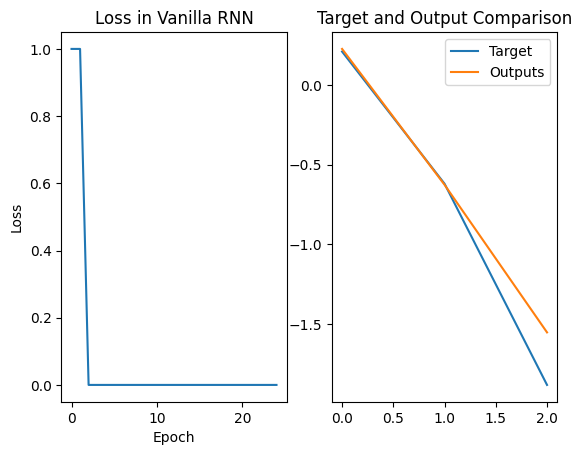

In [17]:
#noise_stddev = 0.1  # Standard deviation of the noise
noise_stddev_range = (0.1, 0.5)  # Range for standard deviation of the noise
noise_stddev = random.uniform(noise_stddev_range[0], noise_stddev_range[1])
print('Standart deviation of the noise = ', noise_stddev)


#vanilla structure normal
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers, transform_function='relu'):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.transform_function = transform_function
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1,nonlinearity='relu', batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        out, hidden = self.rnn(inputs, hidden)
        #out = F.relu(out) #apply transformation function
        out = self.fc(out) #apply yo all nunmber!

        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function='relu'):
    
    N_in = W_in.shape[1]
    N_out = W_out.shape[0]
    N_rec = W_hh.shape[0] 
    
    #add noise to Whh
    noisy_W_hh = add_noise(W_hh)
    print(noisy_W_hh)
    
    rnn_model = VanillaRNN(N_in, N_rec, N_out,num_layers=1, transform_function=transform_function)
    
    with torch.no_grad():
        
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(noisy_W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.zeros_like(b_hh, dtype=torch.float))
        #acrescentamos isto
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))
    
    return rnn_model

#add noise function
def add_noise(tensor):
    
    noise = torch.randn_like(tensor)
    noisy_tensor = tensor + noise
    return noisy_tensor
#----------------------------------------
# ----------------parameters-------------
#----------------------------------------

#define alpha & beta
#beta/alpha capacity
#input weight matrix
W_in = torch.eye(2)
print('W_inn=',W_in)

#recurrent weight matrix
W_hh = torch.eye(2)
print('W_hh=',W_hh)

#output weitght matrix
W_out = torch.Tensor(np.array([[-1,1]]))
print('w_out=',W_out)

#recurrent bias
b_hh = torch.Tensor(np.array([[0,0]]))
print('b_hh=',b_hh)

#output bias
b_out = torch.Tensor([0])
print('b_out=',b_out)


rnn_model = make_rnn_from_networkparameters(W_in,W_hh,W_out,b_hh,b_out)
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

#input_sequence = torch.Tensor([[1, 0], [0, 1], [1, 1]])  
input_size = 2
input_length = 3
batch_size= 3
output_size = 1
input_sequence = abs(torch.randn(batch_size, input_length, input_size))


#inicialize the hidden state
hidden_state = rnn_model.init_hidden(input_sequence.size(0)) 

targets = input_sequence[:, :, 1] - input_sequence[:, :, 0]
targets_cumsum = torch.cumsum(targets, axis=1) #cumulative sum
target_output = targets_cumsum.unsqueeze(2)

print('hidden state = ',hidden_state)
print('Input Sequence = ',input_sequence)
print('Target = ',target_output)


num_epochs = 25

#----------------------------------------
# ----------------train-------------------
#----------------------------------------
pl_output = []
pl_targets = []
loss_vector = []
output_vector = []

for epoch in range(num_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    batch_loss = 0.0
    for batch in range(batch_size):
        input_batch = input_sequence[batch].unsqueeze(0)
        target_batch = target_output[batch].unsqueeze(0)
        hidden_batch = hidden_state[:, batch, :].unsqueeze(1)
        
        # Forward pass
        outputs, hidden = rnn_model(input_batch, hidden_batch)
        #pl_output.append(outputs.item())
        #print('Outputs[',epoch,']=',outputs)
        loss = criterion(outputs, target_batch)
        #pl_targets.append(target_output1)
        #plt.plot(target_output,outputs)
        # Backward pass and optimization
        batch_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #print('targets: numero=',epoch,' and batch size=',batch,' é igual',target_batch)
        #print('outputs: numero=',epoch,' and batch size=',batch,' é igual',outputs)
        
        
        #plt.figure()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #plt.plot(target_batch[0,:,0].detach().numpy(),label='Target')
        #plt.plot(outputs[0,:,0].detach().numpy(),label='Outputs')
        #plt.legend()
        if epoch == num_epochs-1:
            #print('outputs = ',outputs)
            output_vector.append(outputs)
        # Print the training loss for every 100 epochs
    batch_loss /= batch_size
    loss_vector.append(round(batch_loss))
    
        #if (epoch+1) % 10 == 0:
            #print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

outputs_final = torch.cat(output_vector,dim=0)
print('-----After Training------')
print('Outputs=',outputs_final)
print('Loss=',loss_vector)

import matplotlib.pyplot as plt
plt.subplot(121)
#PLOT THE LOSS
x_axis = torch.arange(0, num_epochs)
plt.subplot(121)
plt.plot(x_axis, loss_vector)
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(122)
### PRINT THE OUTPUT AND TARGET
plt.plot(target_output[0,:,0].detach().numpy(),label='Target')
plt.plot(outputs_final[0,:,0].detach().numpy(),label='Outputs')
plt.title('Target and Output Comparison')
plt.legend()

#----------------------------------------
# ----------------test-------------------
#----------------------------------------
print('------Evaluation Test---------')
rnn_model.eval()

#forward pass on test input
test_outputs, _ = rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0)))
eval_loss = criterion(test_outputs, target_output)
#print(rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0))))
# Print the test outputs
print("Test Outputs:",test_outputs)
print("Evaluation Loss:", eval_loss.item())


3 - Noise in the input and layer

Standart deviation of the noise =  0.391288284571948
W_inn= tensor([[1., 0.],
        [0., 1.]])
W_hh= tensor([[1., 0.],
        [0., 1.]])
w_out= tensor([[-1.,  1.]])
b_hh= tensor([[0., 0.]])
b_out= tensor([0.])
NOISY W_HH =  tensor([[ 1.4407, -0.1618],
        [-0.1340,  0.7466]])
NOISE INPUTS =  tensor([[[-0.0246, -0.4750],
         [ 0.4590,  1.5144],
         [ 1.0158,  0.3202]],

        [[ 0.7302,  1.0449],
         [ 1.7275,  1.0837],
         [ 0.9959,  1.0972]],

        [[ 2.0528,  2.5247],
         [ 0.3137,  0.7795],
         [ 0.1075, -0.2239]],

        [[ 1.2702,  0.5091],
         [ 0.5463,  2.1260],
         [ 2.3068,  0.9949]],

        [[ 0.3857,  1.0286],
         [ 0.6003,  1.9209],
         [ 0.4066,  0.4777]]])
hidden state =  tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])
Target =  tensor([[[-0.4504],
         [ 0.6050],
         [-0.0905]],

        [[ 0.3147],
         [-0.3290],
         [-0.2277]],

        

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3733601670.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3733601670.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(noisy_W_hh, dtype=torch.float))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13892\3733601670.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rnn_model.rnn.bias_hh_l0 = nn.Paramet

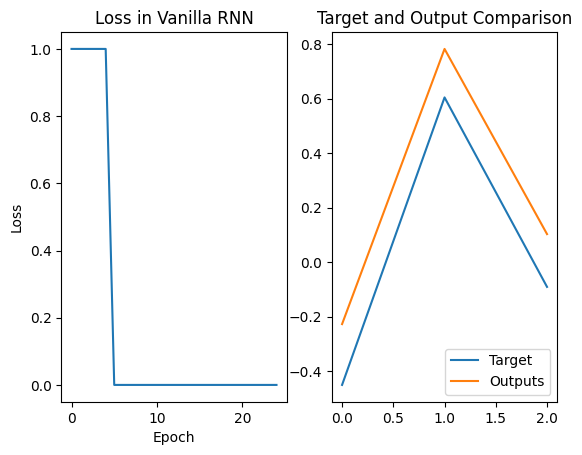

In [19]:
#noise_stddev = 0.1  # Standard deviation of the noise
noise_stddev_range = (0.1, 0.5)  # Range for standard deviation of the noise
noise_stddev = random.uniform(noise_stddev_range[0], noise_stddev_range[1])
print('Standart deviation of the noise = ', noise_stddev)

#vanilla structure normal
class VanillaRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers, transform_function='relu'):
        super(VanillaRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.transform_function = transform_function
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1,nonlinearity='relu', batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, inputs, hidden):
        out, hidden = self.rnn(inputs, hidden)
        #out = F.relu(out) #apply transformation function
        out = self.fc(out) #apply yo all nunmber!

        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size)

def make_rnn_from_networkparameters(W_in, W_hh, W_out, b_hh, b_out, transform_function='relu'):
    
    N_in = W_in.shape[1]
    N_out = W_out.shape[0]
    N_rec = W_hh.shape[0] 
    
    #add noise to Whh
    noisy_W_hh = add_noise(W_hh,noise_stddev)
    print('NOISY W_HH = ',noisy_W_hh)
    
    rnn_model = VanillaRNN(N_in, N_rec, N_out,num_layers=1, transform_function=transform_function)
    
    with torch.no_grad():
        
        rnn_model.rnn.weight_ih_l0 = nn.Parameter(torch.tensor(W_in, dtype=torch.float))
        rnn_model.rnn.weight_hh_l0 = nn.Parameter(torch.tensor(noisy_W_hh, dtype=torch.float))
        rnn_model.rnn.bias_ih_l0 = nn.Parameter(torch.zeros_like(b_hh, dtype=torch.float))
        #acrescentamos isto
        rnn_model.rnn.bias_hh_l0 = nn.Parameter(torch.tensor(b_hh, dtype=torch.float))
        rnn_model.fc.weight = nn.Parameter(torch.tensor(W_out, dtype=torch.float))
        rnn_model.fc.bias = nn.Parameter(torch.tensor(b_out, dtype=torch.float))
    
    return rnn_model

#add noise function
def add_noise(tensor, noise_stddev):
    
    noise = torch.randn_like(tensor) * noise_stddev
    noisy_tensor = tensor + noise
    return noisy_tensor
#----------------------------------------
# ----------------parameters-------------
#----------------------------------------

#define alpha & beta
#beta/alpha capacity
#input weight matrix
W_in = torch.eye(2)
print('W_inn=',W_in)

#recurrent weight matrix
W_hh = torch.eye(2)
print('W_hh=',W_hh)

#output weitght matrix
W_out = torch.Tensor(np.array([[-1,1]]))
print('w_out=',W_out)

#recurrent bias
b_hh = torch.Tensor(np.array([[0,0]]))
print('b_hh=',b_hh)

#output bias
b_out = torch.Tensor([0])
print('b_out=',b_out)


rnn_model = make_rnn_from_networkparameters(W_in,W_hh,W_out,b_hh,b_out)
criterion = nn.MSELoss()
optimizer = optim.SGD(rnn_model.parameters(), lr=0.01)

#input_sequence = torch.Tensor([[1, 0], [0, 1], [1, 1]])  
input_size = 2
input_length = 3
batch_size= 5
output_size = 1
input_sequence = abs(torch.randn(batch_size, input_length, input_size))

#add nosie
noisy_input_sequence = add_noise(input_sequence, noise_stddev)
print('NOISE INPUTS = ',noisy_input_sequence)

#inicialize the hidden state
hidden_state = rnn_model.init_hidden(noisy_input_sequence.size(0)) 

targets = noisy_input_sequence[:, :, 1] - noisy_input_sequence[:, :, 0]
targets_cumsum = torch.cumsum(targets, axis=1) #cumulative sum
target_output = targets_cumsum.unsqueeze(2)

print('hidden state = ',hidden_state)
print('Target = ',target_output)


num_epochs = 25

#----------------------------------------
# ----------------train-------------------
#----------------------------------------
pl_output = []
pl_targets = []
loss_vector = []
output_vector = []

for epoch in range(num_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    batch_loss = 0.0
    for batch in range(batch_size):
        input_batch = noisy_input_sequence[batch].unsqueeze(0)
        target_batch = target_output[batch].unsqueeze(0)
        hidden_batch = hidden_state[:, batch, :].unsqueeze(1)
        
        # Forward pass
        outputs, hidden = rnn_model(input_batch, hidden_batch)
        #pl_output.append(outputs.item())
        #print('Outputs[',epoch,']=',outputs)
        loss = criterion(outputs, target_batch)
        #pl_targets.append(target_output1)
        #plt.plot(target_output,outputs)
        # Backward pass and optimization
        batch_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #print('targets: numero=',epoch,' and batch size=',batch,' é igual',target_batch)
        #print('outputs: numero=',epoch,' and batch size=',batch,' é igual',outputs)
        
        
        #plt.figure()
        #plt.plot(target_batch[0,:,0].detach().numpy(),outputs[0,:,0].detach().numpy())
        #plt.plot(target_batch[0,:,0].detach().numpy(),label='Target')
        #plt.plot(outputs[0,:,0].detach().numpy(),label='Outputs')
        #plt.legend()
        if epoch == num_epochs-1:
            #print('outputs = ',outputs)
            output_vector.append(outputs)
        # Print the training loss for every 100 epochs
    batch_loss /= batch_size
    loss_vector.append(round(batch_loss))
    
        #if (epoch+1) % 10 == 0:
            #print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

outputs_final = torch.cat(output_vector,dim=0)
print('-----After Training------')
print('Outputs=',outputs_final)
print('Loss=',loss_vector)

import matplotlib.pyplot as plt
plt.subplot(121)
#PLOT THE LOSS
x_axis = torch.arange(0, num_epochs)
plt.subplot(121)
plt.plot(x_axis, loss_vector)
plt.title('Loss in Vanilla RNN')
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(122)
### PRINT THE OUTPUT AND TARGET
plt.plot(target_output[0,:,0].detach().numpy(),label='Target')
plt.plot(outputs_final[0,:,0].detach().numpy(),label='Outputs')
plt.title('Target and Output Comparison')
plt.legend()

#----------------------------------------
# ----------------test-------------------
#----------------------------------------
print('------Evaluation Test---------')
rnn_model.eval()

#forward pass on test input
test_outputs, _ = rnn_model(noisy_input_sequence, rnn_model.init_hidden(noisy_input_sequence.size(0)))
eval_loss = criterion(test_outputs, target_output)
#print(rnn_model(input_sequence, rnn_model.init_hidden(input_sequence.size(0))))
# Print the test outputs
print("Test Outputs:",test_outputs)
print("Evaluation Loss:", eval_loss.item())
